# Demonstration 4: Transition to Depression

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from sisyphus.envs import Helplessness
from mpl_toolkits.axes_grid1 import make_axes_locatable
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5)
img_dir = os.path.join('..','figures')
%matplotlib inline

## Value Iteration

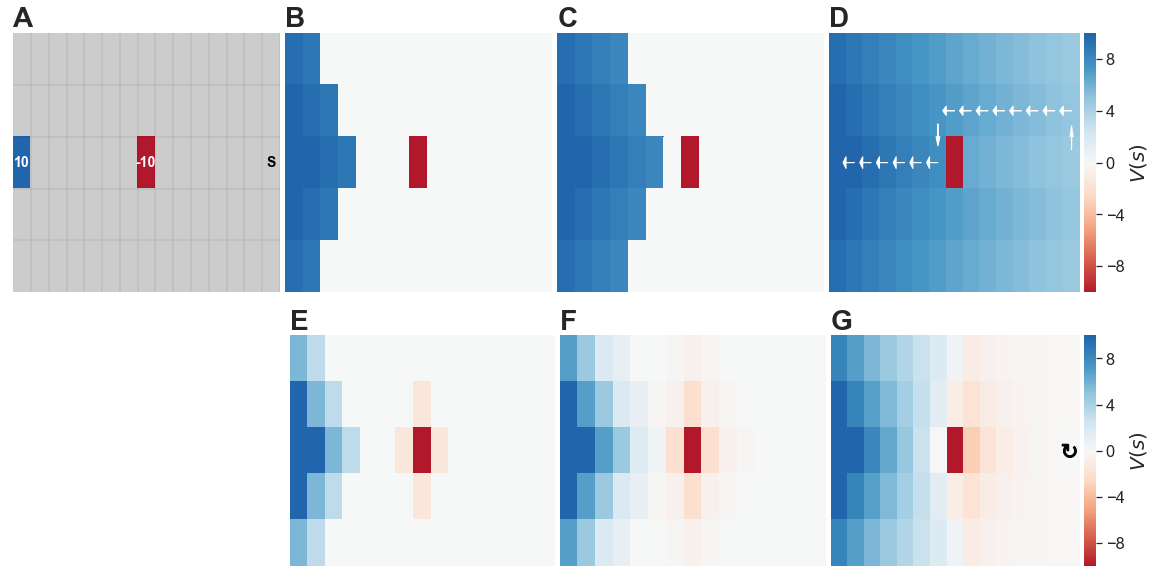

In [2]:
from sisyphus.mdp import ValueIteration
from palettable.colorbrewer.diverging import RdBu_9 as palette

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Simulation parameters.
weights = [1.0, 0.6]
gamma = 0.95
max_iters = [3,5,100]

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Main loop.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Initialize figure.
fig = plt.figure(figsize=(16,8))
cmap = palette.get_mpl_colormap()
colors = palette.hex_colors
titles = [['A','B','C','D'],['E','F','G']]

## Initialize plots.
gs1 = gridspec.GridSpec(1,4)
gs1.update(left=0.01, right=0.95, bottom=0.5, top=0.95, hspace=0, wspace=0.02)

gs2 = gridspec.GridSpec(1,3)
gs2.update(left=0.25, right=0.95, bottom=0.025, top=0.425, hspace=0, wspace=0.02)

gs = [gs1,gs2]

## Initialize environment.
gym = Helplessness()

## Main loop.
for i, w in enumerate(weights):
        
    for j, max_iter in enumerate(max_iters):
        
        #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
        ### Value iteration.
        #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
        
        ## Initialize agent.
        qvi = ValueIteration(policy='pessimism', gamma=gamma, w=w, max_iter=max_iter)
        
        ## Solve for Q-values.
        qvi = qvi.fit(gym, verbose=False)
        
        ## Fill in terminal states.
        V = qvi.V[np.arange(qvi.V.size) != 45].copy()
        V[gym.terminal[:2]] = [10,-10]
        V = V.reshape(5, 15)
                
        #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
        ### Plotting.
        #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

        ## Plot environment.
        if not i and not j:
        
            ax = plt.subplot(gs[i][j])
            ax = gym.plot_lh(reward_color=colors[-1], punishment_color=colors[0], ax=ax, 
                             annot_kws=dict(fontsize=14,fontweight='bold',color='w'))
            ax.text(0,0,titles[i][j],ha='left',va='bottom',fontsize=28,fontweight='bold')
            
        ## Plot value.
        ax = plt.subplot(gs[i][j+1-i])
        if j == 2:
            
            ## Setup colorbar.
            divider = make_axes_locatable(ax)
            cax = divider.append_axes("right", size="5%", pad=0.05)  
            
            ## Plot value.
            sns.heatmap(V, cmap=cmap, center=0, vmin=-10, vmax=10, cbar=True,
                        xticklabels=[], yticklabels=[], ax=ax, cbar_ax=cax)
            
            ## Update colorbar.
            cbar = ax.collections[0].colorbar
            cbar.set_label(r'$V(s)$', fontsize=20)
            
        else:
            
            ## Plot value.
            sns.heatmap(V, cmap=cmap, center=0, vmin=-10, vmax=10, cbar=False,
                        xticklabels=[], yticklabels=[], ax=ax)
            
        ## Plot policy.
        if j == 2 and w == 1:
            
            ax = gym.plot_policy(ax, qvi.pi, color='w', head_width=0.15)
            
        elif j == 2:
            
            ax.scatter(14.25, 2.5, s=250, marker=r'$\circlearrowright$', color='k')
            
        ## Draw plot legends.
        ax.text(0,0,titles[i][j+1-i],ha='left',va='bottom',fontsize=28,fontweight='bold')
            
plt.savefig(os.path.join(img_dir, '03_lh.png'), dpi=600)